In [1]:
import os
import sys
import pandas as pd
from pathlib import Path

# Always set repo root as CWD (fixes all relative paths)
ROOT = Path.cwd()
if ROOT.name == "notebooks":
    ROOT = ROOT.parent
os.chdir(ROOT)

DATA_RAW = Path("data_raw")

# Ensure repo root is on Python path
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

print("CWD:", os.getcwd())
print("Exists data_raw?", DATA_RAW.exists())
print("Files in data_raw:", [p.name for p in DATA_RAW.iterdir()])
print("sys.path[0]:", sys.path[0])
print("Exists src?:", (ROOT / "src").exists())

store_info = pd.read_csv(DATA_RAW / "store_info.csv")
perf = pd.read_csv(DATA_RAW / "store_performance_2018to2022.csv")

print("\nSTORE_INFO COLUMNS:", store_info.columns.tolist())
print("PERF COLUMNS:", perf.columns.tolist()[:30], "...")
print("perf rows:", len(perf))

CWD: /Users/harshini/GenAI-Weather-Based-Store-Analytics
Exists data_raw? True
Files in data_raw: ['store_info.csv', 'store_performance_2018to2022.csv', 'weather_cache']
sys.path[0]: /Users/harshini/GenAI-Weather-Based-Store-Analytics
Exists src?: True

STORE_INFO COLUMNS: ['store_id', 'store_city', 'store_state', 'store_zip', 'bay_count', 'time_zone_code', 'closed_day_description', 'region_id', 'company_id', 'market_id', 'area_id', 'marketing_area_id', 'store_latitude', 'store_longitude']
PERF COLUMNS: ['invoice_date', 'store_id', 'invoice_count', 'oc_count', 'fleet_oc_count'] ...
perf rows: 773266


In [2]:
import meteostat, inspect

print("meteostat file:", meteostat.__file__)
print("meteostat version:", getattr(meteostat, "__version__", "unknown"))

print("\nTop-level names containing 'Daily':")
print([n for n in dir(meteostat) if "Daily" in n])

print("\nTop-level names containing 'Point':")
print([n for n in dir(meteostat) if "Point" in n])

meteostat file: /Users/harshini/GenAI-Weather-Based-Store-Analytics/.venv/lib/python3.14/site-packages/meteostat/__init__.py
meteostat version: 1.7.6

Top-level names containing 'Daily':
['Daily']

Top-level names containing 'Point':
['Point']


In [3]:
from src.weather.meteostat_client import get_daily_weather, WeatherConfig
from src.weather.features import add_weather_features

print("Imports successful")

Imports successful


In [4]:
from src.weather.meteostat_client import get_daily_weather, WeatherConfig

# Compute date range from performance
perf["invoice_date"] = pd.to_datetime(perf["invoice_date"]).dt.normalize()
start_date = perf["invoice_date"].min().date().isoformat()
end_date = perf["invoice_date"].max().date().isoformat()

print("Weather date range:", start_date, "to", end_date)

# Only stores that actually appear in performance
active_store_ids = sorted(perf["store_id"].astype(str).unique())
stores = store_info[store_info["store_id"].astype(str).isin(active_store_ids)].copy()

print("Active stores:", len(active_store_ids))
print("Stores with lat/lon:", len(stores))

cfg = WeatherConfig(cache_dir=Path("data_raw/weather_cache"))

all_weather = []

for _, r in stores.iterrows():
    sid = str(r["store_id"])
    lat = float(r["store_latitude"])
    lon = float(r["store_longitude"])

    w = get_daily_weather(
        store_id=sid,
        lat=lat,
        lon=lon,
        start_date=start_date,
        end_date=end_date,
        cfg=cfg,
        refresh=False,
        verbose=True
    )
    all_weather.append(w)

weather_daily = pd.concat(all_weather, ignore_index=True)

print("weather_daily shape:", weather_daily.shape)
weather_daily.head()

Weather date range: 2018-01-02 to 2022-12-31
Active stores: 439
Stores with lat/lon: 439
[FETCH] store_id=79609 lat=38.01075 lon=-84.45542
[COVERAGE] store_id=79609, rows=1825
[FETCH] store_id=84321 lat=38.00875 lon=-84.51716
[COVERAGE] store_id=84321, rows=1825
[FETCH] store_id=84832 lat=38.17055 lon=-84.899
[COVERAGE] store_id=84832, rows=1825
[FETCH] store_id=84855 lat=38.05023 lon=-84.71144
[COVERAGE] store_id=84855, rows=1825
[FETCH] store_id=84954 lat=38.18845 lon=-84.56283
[COVERAGE] store_id=84954, rows=1825
[FETCH] store_id=84970 lat=37.9951 lon=-84.21457
[COVERAGE] store_id=84970, rows=1825
[FETCH] store_id=88322 lat=38.95583 lon=-84.6264


[COVERAGE] store_id=88322, rows=1825
[FETCH] store_id=88342 lat=39.02139 lon=-84.58572


[COVERAGE] store_id=88342, rows=1825
[FETCH] store_id=88667 lat=39.19137 lon=-84.6581
[COVERAGE] store_id=88667, rows=1825
[FETCH] store_id=91522 lat=43.1329 lon=-77.44214


[COVERAGE] store_id=91522, rows=1825
[FETCH] store_id=96714 lat=43.05101 lon=-76.13608


[COVERAGE] store_id=96714, rows=1825
[FETCH] store_id=96791 lat=43.02955 lon=-76.01529
[COVERAGE] store_id=96791, rows=1825
[FETCH] store_id=98317 lat=38.28214 lon=-85.63176


[COVERAGE] store_id=98317, rows=1825
[FETCH] store_id=98318 lat=38.14413 lon=-85.58502
[COVERAGE] store_id=98318, rows=1825
[FETCH] store_id=98325 lat=38.19959 lon=-85.66269
[COVERAGE] store_id=98325, rows=1825
[FETCH] store_id=98328 lat=38.2455 lon=-85.52385
[COVERAGE] store_id=98328, rows=1825
[FETCH] store_id=99137 lat=36.03573 lon=-86.78703
[COVERAGE] store_id=99137, rows=1825
[FETCH] store_id=99210 lat=38.17016 lon=-85.82671
[COVERAGE] store_id=99210, rows=1825
[FETCH] store_id=99211 lat=38.19416 lon=-85.8049
[COVERAGE] store_id=99211, rows=1825
[FETCH] store_id=99213 lat=35.81209 lon=-86.3667


[COVERAGE] store_id=99213, rows=1825
[FETCH] store_id=99214 lat=36.04521 lon=-86.66272
[COVERAGE] store_id=99214, rows=1825
[FETCH] store_id=99215 lat=36.07443 lon=-86.92339
[COVERAGE] store_id=99215, rows=1825
[FETCH] store_id=99222 lat=36.38038 lon=-86.46557


[COVERAGE] store_id=99222, rows=1825
[FETCH] store_id=99300 lat=42.94207 lon=-76.55241
[COVERAGE] store_id=99300, rows=1825
[FETCH] store_id=100502 lat=36.18539 lon=-86.60917
[COVERAGE] store_id=100502, rows=1825
[FETCH] store_id=100511 lat=36.20156 lon=-86.29172
[COVERAGE] store_id=100511, rows=1825
[FETCH] store_id=102084 lat=35.08283 lon=-85.20444
[COVERAGE] store_id=102084, rows=1825
[FETCH] store_id=102095 lat=35.20517 lon=-89.76329


[COVERAGE] store_id=102095, rows=1825
[FETCH] store_id=102098 lat=35.09282 lon=-89.80971
[COVERAGE] store_id=102098, rows=1825
[FETCH] store_id=102301 lat=35.89847 lon=-84.12988


[COVERAGE] store_id=102301, rows=1825
[FETCH] store_id=102310 lat=35.93171 lon=-84.01413
[COVERAGE] store_id=102310, rows=1825
[FETCH] store_id=103090 lat=34.96147 lon=-89.85423
[COVERAGE] store_id=103090, rows=1825
[FETCH] store_id=103427 lat=38.58558 lon=-89.91141


[COVERAGE] store_id=103427, rows=1825
[FETCH] store_id=103472 lat=38.78067 lon=-90.50733
[COVERAGE] store_id=103472, rows=1825
[FETCH] store_id=103483 lat=38.79143 lon=-90.57316
[COVERAGE] store_id=103483, rows=1825
[FETCH] store_id=103590 lat=37.73075 lon=-89.19424


[COVERAGE] store_id=103590, rows=1825
[FETCH] store_id=227050 lat=43.09431 lon=-76.19616
[COVERAGE] store_id=227050, rows=1825
[FETCH] store_id=227051 lat=38.16079 lon=-85.66067
[COVERAGE] store_id=227051, rows=1825
[FETCH] store_id=227710 lat=36.02165 lon=-86.57759
[COVERAGE] store_id=227710, rows=1825
[FETCH] store_id=230573 lat=38.86595 lon=-90.07214
[COVERAGE] store_id=230573, rows=1825
[FETCH] store_id=230574 lat=38.59754 lon=-90.27108
[COVERAGE] store_id=230574, rows=1825
[FETCH] store_id=230575 lat=38.6914 lon=-90.39124
[COVERAGE] store_id=230575, rows=1825
[FETCH] store_id=230579 lat=38.55623 lon=-90.40103
[COVERAGE] store_id=230579, rows=1825
[FETCH] store_id=230585 lat=37.73994 lon=-88.9485
[COVERAGE] store_id=230585, rows=1825
[FETCH] store_id=230586 lat=38.41484 lon=-90.3946
[COVERAGE] store_id=230586, rows=1825
[FETCH] store_id=230652 lat=40.97679 lon=-81.4937
[COVERAGE] store_id=230652, rows=1825
[FETCH] store_id=230657 lat=40.27355 lon=-80.12649


[COVERAGE] store_id=230657, rows=1825
[FETCH] store_id=230663 lat=40.88843 lon=-81.40569
[COVERAGE] store_id=230663, rows=1825
[FETCH] store_id=232111 lat=39.97383 lon=-82.89266
[COVERAGE] store_id=232111, rows=1825
[FETCH] store_id=232118 lat=40.03579 lon=-82.43118
[COVERAGE] store_id=232118, rows=1825
[FETCH] store_id=232119 lat=40.02273 lon=-83.01412
[COVERAGE] store_id=232119, rows=1825
[FETCH] store_id=232120 lat=39.85072 lon=-82.82916
[COVERAGE] store_id=232120, rows=1825
[FETCH] store_id=232121 lat=40.1575 lon=-83.09662
[COVERAGE] store_id=232121, rows=1825
[FETCH] store_id=232122 lat=40.02699 lon=-83.09069
[COVERAGE] store_id=232122, rows=1825
[FETCH] store_id=232129 lat=39.73086 lon=-82.62081
[COVERAGE] store_id=232129, rows=1825
[FETCH] store_id=255711 lat=41.42582 lon=-81.8975
[COVERAGE] store_id=255711, rows=1825
[FETCH] store_id=255716 lat=41.24342 lon=-81.35607
[COVERAGE] store_id=255716, rows=1825
[FETCH] store_id=255718 lat=41.14984 lon=-81.50893
[COVERAGE] store_id=255

[COVERAGE] store_id=255776, rows=1825
[FETCH] store_id=271032 lat=45.07192 lon=-93.26272


[COVERAGE] store_id=271032, rows=1825
[FETCH] store_id=271129 lat=45.03256 lon=-93.37331
[COVERAGE] store_id=271129, rows=1825
[FETCH] store_id=271150 lat=45.20247 lon=-93.23329
[COVERAGE] store_id=271150, rows=1825
[FETCH] store_id=271156 lat=44.80126 lon=-93.57922
[COVERAGE] store_id=271156, rows=1825
[FETCH] store_id=274130 lat=44.84727 lon=-93.2891
[COVERAGE] store_id=274130, rows=1825
[FETCH] store_id=274136 lat=44.17133 lon=-93.98822
[COVERAGE] store_id=274136, rows=1825
[FETCH] store_id=274180 lat=44.95984 lon=-92.72307


[COVERAGE] store_id=274180, rows=1825
[FETCH] store_id=274184 lat=45.0515 lon=-92.98527
[COVERAGE] store_id=274184, rows=1825
[FETCH] store_id=274222 lat=44.7479 lon=-93.35097
[COVERAGE] store_id=274222, rows=1825
[FETCH] store_id=284231 lat=45.08 lon=-93.06023
[COVERAGE] store_id=284231, rows=1825
[FETCH] store_id=284235 lat=35.08401 lon=-85.31731
[COVERAGE] store_id=284235, rows=1825
[FETCH] store_id=284236 lat=45.03234 lon=-92.84907
[COVERAGE] store_id=284236, rows=1825
[FETCH] store_id=603991 lat=39.35528 lon=-82.97672


[COVERAGE] store_id=603991, rows=1825
[FETCH] store_id=607601 lat=35.17961 lon=-84.86674


[COVERAGE] store_id=607601, rows=1825
[FETCH] store_id=609430 lat=45.55002 lon=-94.20785
[COVERAGE] store_id=609430, rows=1825
[FETCH] store_id=610664 lat=44.88868 lon=-92.94562
[COVERAGE] store_id=610664, rows=1825
[FETCH] store_id=611580 lat=47.72943 lon=-116.78716
[COVERAGE] store_id=611580, rows=1825
[FETCH] store_id=611585 lat=44.07121 lon=-123.03267


[COVERAGE] store_id=611585, rows=1825
[FETCH] store_id=611631 lat=46.61819 lon=-120.5601


[COVERAGE] store_id=611631, rows=1825
[FETCH] store_id=611642 lat=45.66417 lon=-122.56132
[COVERAGE] store_id=611642, rows=1825
[FETCH] store_id=611646 lat=47.50639 lon=-122.15698
[COVERAGE] store_id=611646, rows=1825
[FETCH] store_id=611647 lat=44.65427 lon=-124.05417
[COVERAGE] store_id=611647, rows=1825
[FETCH] store_id=611649 lat=46.5932 lon=-120.60653
[COVERAGE] store_id=611649, rows=1825
[FETCH] store_id=611655 lat=45.53698 lon=-122.70452
[COVERAGE] store_id=611655, rows=1825
[FETCH] store_id=611658 lat=47.53765 lon=-122.0372
[COVERAGE] store_id=611658, rows=1825
[FETCH] store_id=611659 lat=43.68417 lon=-116.31465
[COVERAGE] store_id=611659, rows=1825
[FETCH] store_id=611662 lat=47.20522 lon=-122.22913
[COVERAGE] store_id=611662, rows=1825
[FETCH] store_id=611664 lat=47.45307 lon=-122.82224
[COVERAGE] store_id=611664, rows=1825
[FETCH] store_id=611880 lat=47.61344 lon=-122.03516
[COVERAGE] store_id=611880, rows=1825
[FETCH] store_id=611900 lat=39.95706 lon=-86.03627


[COVERAGE] store_id=611900, rows=1825
[FETCH] store_id=613316 lat=44.25543 lon=-121.18136


[COVERAGE] store_id=613316, rows=1825
[FETCH] store_id=613469 lat=45.51455 lon=-122.90218
[COVERAGE] store_id=613469, rows=1825
[FETCH] store_id=613523 lat=44.63791 lon=-123.0731
[COVERAGE] store_id=613523, rows=1825
[FETCH] store_id=614361 lat=32.45829 lon=-93.6613
[COVERAGE] store_id=614361, rows=1825
[FETCH] store_id=614365 lat=32.27603 lon=-95.30709
[COVERAGE] store_id=614365, rows=1825
[FETCH] store_id=614382 lat=32.42014 lon=-93.72076
[COVERAGE] store_id=614382, rows=1825
[FETCH] store_id=614384 lat=32.55554 lon=-93.61402
[COVERAGE] store_id=614384, rows=1825
[FETCH] store_id=614386 lat=32.52099 lon=-93.69589
[COVERAGE] store_id=614386, rows=1825
[FETCH] store_id=614411 lat=32.52613 lon=-94.7857


[COVERAGE] store_id=614411, rows=1825
[FETCH] store_id=614419 lat=32.31631 lon=-95.20345
[COVERAGE] store_id=614419, rows=1825
[FETCH] store_id=614420 lat=32.28037 lon=-95.30533
[COVERAGE] store_id=614420, rows=1825
[FETCH] store_id=614650 lat=41.02386 lon=-80.63395


[COVERAGE] store_id=614650, rows=1825
[FETCH] store_id=615284 lat=29.48513 lon=-98.66705


[COVERAGE] store_id=615284, rows=1825
[FETCH] store_id=615734 lat=40.04271 lon=-84.21093
[COVERAGE] store_id=615734, rows=1825
[FETCH] store_id=615761 lat=39.94992 lon=-86.34559
[COVERAGE] store_id=615761, rows=1825
[FETCH] store_id=615886 lat=42.73024 lon=-84.54423
[COVERAGE] store_id=615886, rows=1825
[FETCH] store_id=615930 lat=42.74152 lon=-84.62152
[COVERAGE] store_id=615930, rows=1825
[FETCH] store_id=615931 lat=42.88507 lon=-85.73739
[COVERAGE] store_id=615931, rows=1825
[FETCH] store_id=615933 lat=41.61627 lon=-83.66382
[COVERAGE] store_id=615933, rows=1825
[FETCH] store_id=615937 lat=42.76003 lon=-84.54323
[COVERAGE] store_id=615937, rows=1825
[FETCH] store_id=615941 lat=42.46215 lon=-83.36908
[COVERAGE] store_id=615941, rows=1825
[FETCH] store_id=615943 lat=42.25602 lon=-84.36253
[COVERAGE] store_id=615943, rows=1825
[FETCH] store_id=615949 lat=42.88353 lon=-85.64608
[COVERAGE] store_id=615949, rows=1825
[FETCH] store_id=615951 lat=42.98493 lon=-85.66689
[COVERAGE] store_id=6

[COVERAGE] store_id=615964, rows=1825
[FETCH] store_id=615965 lat=42.14052 lon=-83.21478
[COVERAGE] store_id=615965, rows=1825
[FETCH] store_id=615966 lat=42.39734 lon=-83.35192
[COVERAGE] store_id=615966, rows=1825
[FETCH] store_id=615969 lat=42.39138 lon=-82.93182
[COVERAGE] store_id=615969, rows=1825
[FETCH] store_id=615970 lat=43.61852 lon=-84.21779
[COVERAGE] store_id=615970, rows=1825
[FETCH] store_id=615971 lat=41.63673 lon=-83.46954
[COVERAGE] store_id=615971, rows=1825
[FETCH] store_id=615979 lat=40.76928 lon=-84.16236


[COVERAGE] store_id=615979, rows=1825
[FETCH] store_id=615980 lat=41.74709 lon=-83.62492
[COVERAGE] store_id=615980, rows=1825
[FETCH] store_id=83444 lat=38.00615 lon=-84.45156
[COVERAGE] store_id=83444, rows=1825
[FETCH] store_id=84328 lat=37.9688 lon=-84.5026
[COVERAGE] store_id=84328, rows=1825
[FETCH] store_id=84856 lat=37.89871 lon=-84.56463
[COVERAGE] store_id=84856, rows=1825
[FETCH] store_id=86857 lat=39.31034 lon=-84.38153


[COVERAGE] store_id=86857, rows=1825
[FETCH] store_id=86858 lat=39.28777 lon=-84.30554
[COVERAGE] store_id=86858, rows=1825
[FETCH] store_id=86859 lat=39.26922 lon=-84.37071
[COVERAGE] store_id=86859, rows=1825
[FETCH] store_id=86967 lat=39.28601 lon=-84.44789
[COVERAGE] store_id=86967, rows=1825
[FETCH] store_id=88343 lat=39.00272 lon=-84.42403
[COVERAGE] store_id=88343, rows=1825
[FETCH] store_id=88645 lat=39.18715 lon=-84.60311
[COVERAGE] store_id=88645, rows=1825
[FETCH] store_id=88646 lat=39.2146 lon=-84.54863
[COVERAGE] store_id=88646, rows=1825
[FETCH] store_id=91490 lat=43.16907 lon=-77.70123
[COVERAGE] store_id=91490, rows=1825
[FETCH] store_id=96711 lat=43.04552 lon=-76.24392
[COVERAGE] store_id=96711, rows=1825
[FETCH] store_id=96713 lat=43.1036 lon=-77.75426


[COVERAGE] store_id=96713, rows=1825
[FETCH] store_id=98316 lat=38.25191 lon=-85.63818
[COVERAGE] store_id=98316, rows=1825
[FETCH] store_id=98326 lat=38.25261 lon=-85.65745
[COVERAGE] store_id=98326, rows=1825
[FETCH] store_id=99120 lat=38.24844 lon=-85.53659
[COVERAGE] store_id=99120, rows=1825
[FETCH] store_id=99124 lat=38.29028 lon=-85.51024
[COVERAGE] store_id=99124, rows=1825
[FETCH] store_id=99133 lat=36.04885 lon=-86.71323
[COVERAGE] store_id=99133, rows=1825
[FETCH] store_id=99134 lat=38.30364 lon=-85.83771
[COVERAGE] store_id=99134, rows=1825
[FETCH] store_id=100500 lat=36.07588 lon=-86.64054
[COVERAGE] store_id=100500, rows=1825
[FETCH] store_id=100501 lat=35.91521 lon=-86.83063
[COVERAGE] store_id=100501, rows=1825
[FETCH] store_id=102082 lat=34.95355 lon=-85.24807


[COVERAGE] store_id=102082, rows=1825
[FETCH] store_id=102091 lat=35.12108 lon=-85.23736
[COVERAGE] store_id=102091, rows=1825
[FETCH] store_id=102097 lat=35.14555 lon=-85.22256
[COVERAGE] store_id=102097, rows=1825
[FETCH] store_id=102302 lat=35.75211 lon=-83.99583
[COVERAGE] store_id=102302, rows=1825
[FETCH] store_id=103423 lat=38.91989 lon=-90.17228
[COVERAGE] store_id=103423, rows=1825
[FETCH] store_id=103426 lat=38.58741 lon=-89.98525
[COVERAGE] store_id=103426, rows=1825
[FETCH] store_id=103435 lat=38.77604 lon=-89.95688
[COVERAGE] store_id=103435, rows=1825
[FETCH] store_id=103470 lat=38.67152 lon=-90.43116
[COVERAGE] store_id=103470, rows=1825
[FETCH] store_id=103484 lat=38.47 lon=-90.30473
[COVERAGE] store_id=103484, rows=1825
[FETCH] store_id=227055 lat=35.20521 lon=-89.83651
[COVERAGE] store_id=227055, rows=1825
[FETCH] store_id=229165 lat=38.09191 lon=-85.66957
[COVERAGE] store_id=229165, rows=1825
[FETCH] store_id=230571 lat=38.68743 lon=-89.97477
[COVERAGE] store_id=2305

[COVERAGE] store_id=232110, rows=1825
[FETCH] store_id=232114 lat=40.09059 lon=-83.05339
[COVERAGE] store_id=232114, rows=1825
[FETCH] store_id=232125 lat=39.9848 lon=-83.15027
[COVERAGE] store_id=232125, rows=1825
[FETCH] store_id=232128 lat=40.0725 lon=-82.86319
[COVERAGE] store_id=232128, rows=1825
[FETCH] store_id=232132 lat=39.9189 lon=-83.12259
[COVERAGE] store_id=232132, rows=1825
[FETCH] store_id=234150 lat=41.23859 lon=-81.81813
[COVERAGE] store_id=234150, rows=1825
[FETCH] store_id=245040 lat=38.71933 lon=-90.12237
[COVERAGE] store_id=245040, rows=1825
[FETCH] store_id=255713 lat=41.38001 lon=-81.73983
[COVERAGE] store_id=255713, rows=1825
[FETCH] store_id=255717 lat=41.25977 lon=-80.78501
[COVERAGE] store_id=255717, rows=1825
[FETCH] store_id=255719 lat=41.41796 lon=-82.20797
[COVERAGE] store_id=255719, rows=1825
[FETCH] store_id=255771 lat=41.13675 lon=-81.80486
[COVERAGE] store_id=255771, rows=1825
[FETCH] store_id=255772 lat=41.10078 lon=-80.74556
[COVERAGE] store_id=2557

[COVERAGE] store_id=608890, rows=1825
[FETCH] store_id=610662 lat=40.10387 lon=-83.7223


[COVERAGE] store_id=610662, rows=1825
[FETCH] store_id=610663 lat=40.11981 lon=-84.62186
[COVERAGE] store_id=610663, rows=1825
[FETCH] store_id=611632 lat=45.41594 lon=-122.59273
[COVERAGE] store_id=611632, rows=1825
[FETCH] store_id=611635 lat=45.44246 lon=-122.80438
[COVERAGE] store_id=611635, rows=1825
[FETCH] store_id=611636 lat=45.45296 lon=-122.72104
[COVERAGE] store_id=611636, rows=1825
[FETCH] store_id=611640 lat=45.34598 lon=-122.65004
[COVERAGE] store_id=611640, rows=1825
[FETCH] store_id=611641 lat=44.95865 lon=-124.01413
[COVERAGE] store_id=611641, rows=1825
[FETCH] store_id=611644 lat=46.58561 lon=-120.54252
[COVERAGE] store_id=611644, rows=1825
[FETCH] store_id=611653 lat=44.93821 lon=-123.06271
[COVERAGE] store_id=611653, rows=1825
[FETCH] store_id=611654 lat=44.53107 lon=-122.90672
[COVERAGE] store_id=611654, rows=1825
[FETCH] store_id=611657 lat=45.62101 lon=-122.47815
[COVERAGE] store_id=611657, rows=1825
[FETCH] store_id=611660 lat=47.46678 lon=-120.33596
[COVERAGE] 

[COVERAGE] store_id=613314, rows=1825
[FETCH] store_id=613317 lat=44.80955 lon=-122.81277
[COVERAGE] store_id=613317, rows=1825
[FETCH] store_id=613520 lat=45.59681 lon=-122.50538
[COVERAGE] store_id=613520, rows=1825
[FETCH] store_id=613521 lat=45.38241 lon=-122.74689
[COVERAGE] store_id=613521, rows=1825
[FETCH] store_id=614362 lat=32.44465 lon=-93.86274
[COVERAGE] store_id=614362, rows=1825
[FETCH] store_id=614381 lat=32.40649 lon=-93.80084
[COVERAGE] store_id=614381, rows=1825
[FETCH] store_id=614383 lat=32.40194 lon=-93.78012
[COVERAGE] store_id=614383, rows=1825
[FETCH] store_id=614388 lat=31.75258 lon=-93.07107
[COVERAGE] store_id=614388, rows=1825
[FETCH] store_id=614389 lat=32.53036 lon=-94.3506
[COVERAGE] store_id=614389, rows=1825
[FETCH] store_id=614410 lat=32.51147 lon=-94.79565
[COVERAGE] store_id=614410, rows=1825
[FETCH] store_id=614413 lat=32.18862 lon=-95.43555
[COVERAGE] store_id=614413, rows=1825
[FETCH] store_id=615281 lat=29.56751 lon=-98.48638
[COVERAGE] store_id

[COVERAGE] store_id=615283, rows=1825
[FETCH] store_id=615287 lat=29.62538 lon=-98.49453
[COVERAGE] store_id=615287, rows=1825
[FETCH] store_id=615842 lat=44.96084 lon=-93.16671
[COVERAGE] store_id=615842, rows=1825
[FETCH] store_id=615887 lat=42.67411 lon=-84.54611
[COVERAGE] store_id=615887, rows=1825
[FETCH] store_id=615932 lat=42.52757 lon=-83.35965
[COVERAGE] store_id=615932, rows=1825
[FETCH] store_id=615938 lat=41.71508 lon=-83.69536
[COVERAGE] store_id=615938, rows=1825
[FETCH] store_id=615942 lat=42.51787 lon=-83.20428
[COVERAGE] store_id=615942, rows=1825
[FETCH] store_id=615947 lat=41.36115 lon=-83.65086
[COVERAGE] store_id=615947, rows=1825
[FETCH] store_id=615974 lat=42.46944 lon=-83.47427
[COVERAGE] store_id=615974, rows=1825
[FETCH] store_id=615975 lat=42.24276 lon=-83.76469
[COVERAGE] store_id=615975, rows=1825
[FETCH] store_id=615977 lat=42.73106 lon=-84.46965
[COVERAGE] store_id=615977, rows=1825
[FETCH] store_id=616170 lat=37.50506 lon=-77.60831
[COVERAGE] store_id=6

[COVERAGE] store_id=86765, rows=1825
[FETCH] store_id=86796 lat=39.35566 lon=-84.39552
[COVERAGE] store_id=86796, rows=1825
[FETCH] store_id=86856 lat=39.33569 lon=-84.52823
[COVERAGE] store_id=86856, rows=1825
[FETCH] store_id=86960 lat=39.04808 lon=-84.24649
[COVERAGE] store_id=86960, rows=1825
[FETCH] store_id=86961 lat=39.1956 lon=-84.23327
[COVERAGE] store_id=86961, rows=1825
[FETCH] store_id=87047 lat=39.22946 lon=-84.5101
[COVERAGE] store_id=87047, rows=1825
[FETCH] store_id=88321 lat=38.98626 lon=-84.6513
[COVERAGE] store_id=88321, rows=1825
[FETCH] store_id=88323 lat=39.01983 lon=-84.68934
[COVERAGE] store_id=88323, rows=1825
[FETCH] store_id=88344 lat=39.15092 lon=-84.62821
[COVERAGE] store_id=88344, rows=1825
[FETCH] store_id=88665 lat=39.72907 lon=-84.05698


[COVERAGE] store_id=88665, rows=1825
[FETCH] store_id=88666 lat=39.64523 lon=-84.1101
[COVERAGE] store_id=88666, rows=1825
[FETCH] store_id=89528 lat=42.99906 lon=-75.98263
[COVERAGE] store_id=89528, rows=1825
[FETCH] store_id=91520 lat=42.90298 lon=-77.29279
[COVERAGE] store_id=91520, rows=1825
[FETCH] store_id=91521 lat=43.25327 lon=-77.64777
[COVERAGE] store_id=91521, rows=1825
[FETCH] store_id=91523 lat=43.19259 lon=-77.50191
[COVERAGE] store_id=91523, rows=1825
[FETCH] store_id=96710 lat=42.15441 lon=-75.89724
[COVERAGE] store_id=96710, rows=1825
[FETCH] store_id=96712 lat=43.08675 lon=-77.61307
[COVERAGE] store_id=96712, rows=1825
[FETCH] store_id=96717 lat=43.23351 lon=-75.43828


[COVERAGE] store_id=96717, rows=1825
[FETCH] store_id=96740 lat=42.08549 lon=-76.053
[COVERAGE] store_id=96740, rows=1825
[FETCH] store_id=96793 lat=43.15132 lon=-76.22993
[COVERAGE] store_id=96793, rows=1825
[FETCH] store_id=96794 lat=43.15633 lon=-76.12161
[COVERAGE] store_id=96794, rows=1825
[FETCH] store_id=98310 lat=43.04328 lon=-76.06864
[COVERAGE] store_id=98310, rows=1825
[FETCH] store_id=98313 lat=38.19224 lon=-85.60555
[COVERAGE] store_id=98313, rows=1825
[FETCH] store_id=98314 lat=38.21968 lon=-85.62873
[COVERAGE] store_id=98314, rows=1825
[FETCH] store_id=98315 lat=38.23206 lon=-85.70985
[COVERAGE] store_id=98315, rows=1825
[FETCH] store_id=98322 lat=38.20207 lon=-85.57264
[COVERAGE] store_id=98322, rows=1825
[FETCH] store_id=98324 lat=38.2119 lon=-85.59822
[COVERAGE] store_id=98324, rows=1825
[FETCH] store_id=98327 lat=38.28089 lon=-85.59205
[COVERAGE] store_id=98327, rows=1825
[FETCH] store_id=99121 lat=36.11021 lon=-86.74582
[COVERAGE] store_id=99121, rows=1825
[FETCH] s

[COVERAGE] store_id=99212, rows=1825
[FETCH] store_id=99220 lat=38.14528 lon=-85.77555
[COVERAGE] store_id=99220, rows=1825
[FETCH] store_id=99221 lat=36.26288 lon=-86.71268
[COVERAGE] store_id=99221, rows=1825
[FETCH] store_id=99223 lat=36.21492 lon=-86.32548
[COVERAGE] store_id=99223, rows=1825
[FETCH] store_id=100503 lat=36.23126 lon=-86.51703
[COVERAGE] store_id=100503, rows=1825
[FETCH] store_id=100510 lat=35.98484 lon=-86.55028
[COVERAGE] store_id=100510, rows=1825
[FETCH] store_id=102087 lat=34.99217 lon=-90.00518
[COVERAGE] store_id=102087, rows=1825
[FETCH] store_id=102088 lat=34.96304 lon=-89.99238
[COVERAGE] store_id=102088, rows=1825
[FETCH] store_id=102089 lat=35.04585 lon=-89.69501
[COVERAGE] store_id=102089, rows=1825
[FETCH] store_id=102093 lat=35.03442 lon=-85.15496
[COVERAGE] store_id=102093, rows=1825
[FETCH] store_id=102311 lat=35.81372 lon=-84.26456


[COVERAGE] store_id=102311, rows=1825
[FETCH] store_id=103420 lat=37.73237 lon=-84.28242
[COVERAGE] store_id=103420, rows=1825
[FETCH] store_id=103422 lat=38.79941 lon=-90.31788
[COVERAGE] store_id=103422, rows=1825
[FETCH] store_id=103424 lat=38.79372 lon=-90.28715
[COVERAGE] store_id=103424, rows=1825
[FETCH] store_id=103431 lat=38.74913 lon=-90.2791
[COVERAGE] store_id=103431, rows=1825
[FETCH] store_id=103436 lat=38.56075 lon=-90.17345
[COVERAGE] store_id=103436, rows=1825
[FETCH] store_id=103437 lat=38.59329 lon=-89.99465
[COVERAGE] store_id=103437, rows=1825
[FETCH] store_id=103438 lat=38.68067 lon=-90.49686
[COVERAGE] store_id=103438, rows=1825
[FETCH] store_id=103439 lat=38.58705 lon=-90.29218
[COVERAGE] store_id=103439, rows=1825
[FETCH] store_id=103473 lat=38.79334 lon=-90.62302
[COVERAGE] store_id=103473, rows=1825
[FETCH] store_id=103480 lat=38.49848 lon=-90.38049
[COVERAGE] store_id=103480, rows=1825
[FETCH] store_id=103482 lat=38.80513 lon=-90.36229
[COVERAGE] store_id=10

[COVERAGE] store_id=284232, rows=1825
[FETCH] store_id=296420 lat=34.99695 lon=-85.24331
[COVERAGE] store_id=296420, rows=1825
[FETCH] store_id=467032 lat=36.98853 lon=-86.42886
[COVERAGE] store_id=467032, rows=1825
[FETCH] store_id=474640 lat=39.25187 lon=-84.59878
[COVERAGE] store_id=474640, rows=1825
[FETCH] store_id=505060 lat=40.14619 lon=-82.96119
[COVERAGE] store_id=505060, rows=1825
[FETCH] store_id=583300 lat=36.46988 lon=-86.67038
[COVERAGE] store_id=583300, rows=1825
[FETCH] store_id=585340 lat=45.12493 lon=-93.4912
[COVERAGE] store_id=585340, rows=1825
[FETCH] store_id=589460 lat=35.08427 lon=-85.06502
[COVERAGE] store_id=589460, rows=1825
[FETCH] store_id=589530 lat=35.44872 lon=-84.61407


[COVERAGE] store_id=589530, rows=1825
[FETCH] store_id=594140 lat=43.19638 lon=-77.60065
[COVERAGE] store_id=594140, rows=1825
[FETCH] store_id=594141 lat=43.11788 lon=-77.55469
[COVERAGE] store_id=594141, rows=1825
[FETCH] store_id=602320 lat=38.05852 lon=-84.48667
[COVERAGE] store_id=602320, rows=1825
[FETCH] store_id=602950 lat=37.99226 lon=-85.70861
[COVERAGE] store_id=602950, rows=1825
[FETCH] store_id=603020 lat=38.33724 lon=-85.79959
[COVERAGE] store_id=603020, rows=1825
[FETCH] store_id=603022 lat=38.22875 lon=-86.13778
[COVERAGE] store_id=603022, rows=1825
[FETCH] store_id=603024 lat=38.77578 lon=-85.38646


[COVERAGE] store_id=603024, rows=1825
[FETCH] store_id=603480 lat=41.13492 lon=-81.63679
[COVERAGE] store_id=603480, rows=1825
[FETCH] store_id=609431 lat=46.69197 lon=-92.10453
[COVERAGE] store_id=609431, rows=1825
[FETCH] store_id=609432 lat=46.80118 lon=-92.15553
[COVERAGE] store_id=609432, rows=1825
[FETCH] store_id=610070 lat=42.85916 lon=-76.99472
[COVERAGE] store_id=610070, rows=1825
[FETCH] store_id=610660 lat=40.56467 lon=-84.17846
[COVERAGE] store_id=610660, rows=1825
[FETCH] store_id=610661 lat=40.15028 lon=-84.20913
[COVERAGE] store_id=610661, rows=1825
[FETCH] store_id=611205 lat=45.53416 lon=-122.6609
[COVERAGE] store_id=611205, rows=1825
[FETCH] store_id=611569 lat=45.66812 lon=-122.66441
[COVERAGE] store_id=611569, rows=1825
[FETCH] store_id=611581 lat=47.65284 lon=-117.35985
[COVERAGE] store_id=611581, rows=1825
[FETCH] store_id=611582 lat=47.67635 lon=-117.28334
[COVERAGE] store_id=611582, rows=1825
[FETCH] store_id=611583 lat=47.73758 lon=-117.48509
[COVERAGE] store_

[COVERAGE] store_id=611643, rows=1825
[FETCH] store_id=611645 lat=46.99217 lon=-120.54883
[COVERAGE] store_id=611645, rows=1825
[FETCH] store_id=611648 lat=44.55173 lon=-123.30686
[COVERAGE] store_id=611648, rows=1825
[FETCH] store_id=611650 lat=45.01302 lon=-122.78418
[COVERAGE] store_id=611650, rows=1825
[FETCH] store_id=611651 lat=47.61555 lon=-122.62942
[COVERAGE] store_id=611651, rows=1825
[FETCH] store_id=611652 lat=47.22846 lon=-123.12601
[COVERAGE] store_id=611652, rows=1825
[FETCH] store_id=611656 lat=43.97414 lon=-124.0977


[COVERAGE] store_id=611656, rows=1825
[FETCH] store_id=611661 lat=47.40677 lon=-120.28788
[COVERAGE] store_id=611661, rows=1825
[FETCH] store_id=611663 lat=47.0536 lon=-122.29779
[COVERAGE] store_id=611663, rows=1825
[FETCH] store_id=611665 lat=43.58231 lon=-116.1737
[COVERAGE] store_id=611665, rows=1825
[FETCH] store_id=613022 lat=39.09792 lon=-84.27014
[COVERAGE] store_id=613022, rows=1825
[FETCH] store_id=613023 lat=40.14885 lon=-82.97641
[COVERAGE] store_id=613023, rows=1825
[FETCH] store_id=613315 lat=44.02081 lon=-121.31604
[COVERAGE] store_id=613315, rows=1825
[FETCH] store_id=613318 lat=45.22883 lon=-123.17629
[COVERAGE] store_id=613318, rows=1825
[FETCH] store_id=613522 lat=45.34303 lon=-122.5952
[COVERAGE] store_id=613522, rows=1825
[FETCH] store_id=614310 lat=32.56723 lon=-93.71123
[COVERAGE] store_id=614310, rows=1825
[FETCH] store_id=614363 lat=32.44393 lon=-93.72485
[COVERAGE] store_id=614363, rows=1825
[FETCH] store_id=614364 lat=32.30414 lon=-95.32806
[COVERAGE] store_i

[COVERAGE] store_id=615945, rows=1825
[FETCH] store_id=615946 lat=42.29063 lon=-83.27057
[COVERAGE] store_id=615946, rows=1825
[FETCH] store_id=615948 lat=42.52073 lon=-83.06679
[COVERAGE] store_id=615948, rows=1825
[FETCH] store_id=615950 lat=42.91567 lon=-85.58305
[COVERAGE] store_id=615950, rows=1825
[FETCH] store_id=615953 lat=42.92737 lon=-85.61941
[COVERAGE] store_id=615953, rows=1825
[FETCH] store_id=615954 lat=42.76053 lon=-86.11599
[COVERAGE] store_id=615954, rows=1825
[FETCH] store_id=615955 lat=42.82803 lon=-86.13754
[COVERAGE] store_id=615955, rows=1825
[FETCH] store_id=615957 lat=42.8406 lon=-85.67609
[COVERAGE] store_id=615957, rows=1825
[FETCH] store_id=615958 lat=43.02152 lon=-85.63306
[COVERAGE] store_id=615958, rows=1825
[FETCH] store_id=615962 lat=43.46627 lon=-83.9751
[COVERAGE] store_id=615962, rows=1825
[FETCH] store_id=615963 lat=43.61242 lon=-83.91512
[COVERAGE] store_id=615963, rows=1825
[FETCH] store_id=615967 lat=42.61194 lon=-82.97325
[COVERAGE] store_id=615

,store_id,invoice_date,tavg,tmin,tmax,prcp,snow,wspd
0,79609,2018-01-02,-13.8,-19.3,-6.6,0.0,0.0,5.4
1,79609,2018-01-03,-9.3,-15.5,-0.5,0.0,0.0,13.7
2,79609,2018-01-04,-7.9,-13.2,-4.9,0.0,0.0,16.9
3,79609,2018-01-05,-11.1,-14.9,-7.1,0.0,0.0,9.4
4,79609,2018-01-06,-12.3,-18.8,-5.5,0.0,0.0,4.0


In [5]:
from pathlib import Path

cache_dir = Path("data_raw/weather_cache")
files = sorted(cache_dir.glob("store_id=*_daily.csv"))

print("Cache dir exists:", cache_dir.exists())
print("Cached store files:", len(files))
print("First 5 cache files:", [f.name for f in files[:5]])

Cache dir exists: True
Cached store files: 439
First 5 cache files: ['store_id=100500_daily.csv', 'store_id=100501_daily.csv', 'store_id=100502_daily.csv', 'store_id=100503_daily.csv', 'store_id=100510_daily.csv']


In [7]:
import re
import pandas as pd

def store_id_from_filename(path):
    m = re.search(r"store_id=(\d+)_daily\.csv", path.name)
    return m.group(1) if m else None

dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=["invoice_date"])
    
    # Inject store_id if missing
    if "store_id" not in df.columns:
        sid = store_id_from_filename(f)
        df.insert(0, "store_id", sid)
    
    dfs.append(df)

weather_daily = pd.concat(dfs, ignore_index=True)

print("weather_daily columns:", weather_daily.columns.tolist())
print("weather_daily shape:", weather_daily.shape)
weather_daily.head()

weather_daily columns: ['store_id', 'invoice_date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd']
weather_daily shape: (783593, 8)


,store_id,invoice_date,tavg,tmin,tmax,prcp,snow,wspd
0,100500,2018-01-02 00:00:00,-10.3,-14.9,-2.7,0.0,0.0,7.9
1,100500,2018-01-03 00:00:00,-5.0,-8.8,2.8,0.0,0.0,9.4
2,100500,2018-01-04 00:00:00,-6.3,-11.6,-4.3,0.0,0.0,13.7
3,100500,2018-01-05 00:00:00,-6.2,-9.3,-0.5,0.0,0.0,9.4
4,100500,2018-01-06 00:00:00,-5.7,-11.0,-1.0,0.0,0.0,8.6


In [8]:
from src.weather.features import add_weather_features

weather_features = add_weather_features(weather_daily)

print("weather_features shape:", weather_features.shape)
weather_features.head()

weather_features shape: (783593, 34)


,store_id,invoice_date,tavg,tmin,tmax,prcp,snow,wspd,tavg_lag1,tavg_lag3,...,wspd_lag3,wspd_lag7,tavg_rollmean_3,prcp_rollsum_3,tavg_rollmean_7,prcp_rollsum_7,tavg_anom_30,dow,month,is_weekend
0,100500,2018-01-02,-10.3,-14.9,-2.7,0.0,0.0,7.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
1,100500,2018-01-03,-5.0,-8.8,2.8,0.0,0.0,9.4,-10.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
2,100500,2018-01-04,-6.3,-11.6,-4.3,0.0,0.0,13.7,-5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0
3,100500,2018-01-05,-6.2,-9.3,-0.5,0.0,0.0,9.4,-6.3,-10.3,...,7.9,NaN,-7.200000,0.0,NaN,NaN,NaN,4,1,0
4,100500,2018-01-06,-5.7,-11.0,-1.0,0.0,0.0,8.6,-6.2,-5.0,...,9.4,NaN,-5.833333,0.0,NaN,NaN,NaN,5,1,1


In [9]:
# --- Date continuity check ---
expected_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

store_counts = (
    weather_features.groupby("store_id")["invoice_date"]
    .nunique()
    .reset_index(name="n_days")
)

print("Expected days per store:", expected_days)
print("Stores failing continuity:", len(store_counts[store_counts["n_days"] != expected_days]))
store_counts.head()

Expected days per store: 1825
Stores failing continuity: 9


,store_id,n_days
0,100500,1825
1,100501,1825
2,100502,1825
3,100503,1825
4,100510,1825


In [10]:
bad_stores = store_counts[store_counts["n_days"] != expected_days]
print(bad_stores)

    store_id  n_days
162   583300    1083
165   589530    1083
177   603024    1082
179   603991    1082
226   611656     240
387    91520     252
395    96717    1824
431    99222    1083
433    99300     239


In [11]:
bad_id = bad_stores.iloc[0]["store_id"]
print("Inspecting store:", bad_id)

bad_df = weather_features[weather_features["store_id"] == bad_id]

print("Unique days:", bad_df["invoice_date"].nunique())
print("Total rows:", len(bad_df))

bad_df.sort_values("invoice_date").head()
bad_df.sort_values("invoice_date").tail()

Inspecting store: 583300
Unique days: 1083
Total rows: 1083


,store_id,invoice_date,tavg,tmin,tmax,prcp,snow,wspd,tavg_lag1,tavg_lag3,...,wspd_lag3,wspd_lag7,tavg_rollmean_3,prcp_rollsum_3,tavg_rollmean_7,prcp_rollsum_7,tavg_anom_30,dow,month,is_weekend
296728,583300,2022-12-27,-0.7,-4.0,2.0,0.0,NaN,6.4,-2.9,-11.3,...,18.0,5.5,-7.566667,1.1,-3.871429,10.2,-5.700000,1,12,0
296729,583300,2022-12-28,6.7,-3.0,14.0,0.0,NaN,16.6,-0.7,-8.5,...,10.3,7.5,-4.033333,1.1,-4.514286,10.2,2.103333,2,12,0
296730,583300,2022-12-29,12.7,10.0,15.0,0.2,NaN,18.3,6.7,-2.9,...,11.5,17.4,1.033333,1.1,-4.200000,10.2,8.170000,3,12,0
296731,583300,2022-12-30,14.9,12.0,19.0,0.5,NaN,13.5,12.7,-0.7,...,6.4,24.5,6.233333,0.2,-3.042857,1.3,10.346667,4,12,0
296732,583300,2022-12-31,12.2,7.0,16.0,4.5,NaN,10.3,14.9,6.7,...,16.6,18.0,11.433333,0.7,1.557143,1.8,7.323333,5,12,1


In [12]:
bad_ids = bad_stores["store_id"].astype(str).tolist()
print(bad_ids)

['583300', '589530', '603024', '603991', '611656', '91520', '96717', '99222', '99300']


In [13]:
from pathlib import Path

cache_dir = Path("data_raw/weather_cache")

for sid in bad_ids:
    f = cache_dir / f"store_id={sid}_daily.csv"
    if f.exists():
        f.unlink()
        print("Deleted:", f.name)

Deleted: store_id=583300_daily.csv
Deleted: store_id=589530_daily.csv
Deleted: store_id=603024_daily.csv
Deleted: store_id=603991_daily.csv
Deleted: store_id=611656_daily.csv
Deleted: store_id=91520_daily.csv
Deleted: store_id=96717_daily.csv
Deleted: store_id=99222_daily.csv
Deleted: store_id=99300_daily.csv


In [14]:
from src.weather.meteostat_client import get_daily_weather, WeatherConfig

cfg = WeatherConfig(cache_dir=Path("data_raw/weather_cache"))

for sid in bad_ids:
    r = stores[stores["store_id"].astype(str) == sid].iloc[0]
    
    get_daily_weather(
        store_id=sid,
        lat=float(r["store_latitude"]),
        lon=float(r["store_longitude"]),
        start_date=start_date,
        end_date=end_date,
        cfg=cfg,
        refresh=False,
        verbose=True
    )

[FETCH] store_id=583300 lat=36.46988 lon=-86.67038
[COVERAGE] store_id=583300, rows=1825
[FETCH] store_id=589530 lat=35.44872 lon=-84.61407
[COVERAGE] store_id=589530, rows=1825
[FETCH] store_id=603024 lat=38.77578 lon=-85.38646
[COVERAGE] store_id=603024, rows=1825
[FETCH] store_id=603991 lat=39.35528 lon=-82.97672
[COVERAGE] store_id=603991, rows=1825
[FETCH] store_id=611656 lat=43.97414 lon=-124.0977
[COVERAGE] store_id=611656, rows=1825
[FETCH] store_id=91520 lat=42.90298 lon=-77.29279
[COVERAGE] store_id=91520, rows=1825
[FETCH] store_id=96717 lat=43.23351 lon=-75.43828
[COVERAGE] store_id=96717, rows=1825
[FETCH] store_id=99222 lat=36.38038 lon=-86.46557
[COVERAGE] store_id=99222, rows=1825
[FETCH] store_id=99300 lat=42.94207 lon=-76.55241
[COVERAGE] store_id=99300, rows=1825


In [15]:
dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=["invoice_date"])
    if "store_id" not in df.columns:
        sid = store_id_from_filename(f)
        df.insert(0, "store_id", sid)
    dfs.append(df)

weather_daily = pd.concat(dfs, ignore_index=True)

In [16]:
weather_features = add_weather_features(weather_daily)

In [17]:
import pandas as pd

# use the same start_date/end_date you computed earlier
expected_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

store_counts = (
    weather_features.groupby("store_id")["invoice_date"]
    .nunique()
    .reset_index(name="n_days")
)

bad_stores = store_counts[store_counts["n_days"] != expected_days].sort_values("n_days")

print("Expected days per store:", expected_days)
print("Stores failing continuity:", len(bad_stores))

# Show the failing ones (if any)
display(bad_stores)

Expected days per store: 1825
Stores failing continuity: 9


,store_id,n_days
433,99300,239
226,611656,240
387,91520,252
177,603024,1082
179,603991,1082
162,583300,1083
165,589530,1083
431,99222,1083
395,96717,1824


In [19]:
import pandas as pd
import re

base = pd.DataFrame({"invoice_date": pd.date_range(start_date, end_date, freq="D")})
expected_days = len(base)
print("Expected days:", expected_days)

def store_id_from_filename(path):
    m = re.search(r"store_id=(\d+)_daily\.csv", path.name)
    return m.group(1) if m else None

dfs = []
empty_files = []

for f in files:
    sid = store_id_from_filename(f)  # ALWAYS get sid from filename

    df = pd.read_csv(f, parse_dates=["invoice_date"])
    if len(df) == 0:
        # empty cache file -> still create full date skeleton with all NaNs
        full = base.copy()
        full.insert(0, "store_id", sid)
        dfs.append(full)
        empty_files.append(f.name)
        continue

    # normalize dates and dedupe
    df["invoice_date"] = pd.to_datetime(df["invoice_date"]).dt.normalize()
    df = df.drop_duplicates(subset=["invoice_date"], keep="last")

    # drop store_id column if it exists in file (we enforce from filename)
    df = df.drop(columns=["store_id"], errors="ignore")

    # enforce continuity
    full = base.merge(df, on="invoice_date", how="left")
    full.insert(0, "store_id", sid)

    if len(full) != expected_days:
        print("WARNING length mismatch for store", sid, "len=", len(full))

    dfs.append(full)

weather_daily = pd.concat(dfs, ignore_index=True)
print("weather_daily shape:", weather_daily.shape)
print("Empty cache files:", len(empty_files))
if empty_files:
    print("First 10 empty files:", empty_files[:10])

weather_daily.head()

Expected days: 1825
weather_daily shape: (801175, 8)
Empty cache files: 5
First 10 empty files: ['store_id=230572_daily.csv', 'store_id=603022_daily.csv', 'store_id=611641_daily.csv', 'store_id=96710_daily.csv', 'store_id=96740_daily.csv']


,store_id,invoice_date,tavg,tmin,tmax,prcp,snow,wspd
0,100500,2018-01-02,-10.3,-14.9,-2.7,0.0,0.0,7.9
1,100500,2018-01-03,-5.0,-8.8,2.8,0.0,0.0,9.4
2,100500,2018-01-04,-6.3,-11.6,-4.3,0.0,0.0,13.7
3,100500,2018-01-05,-6.2,-9.3,-0.5,0.0,0.0,9.4
4,100500,2018-01-06,-5.7,-11.0,-1.0,0.0,0.0,8.6


In [20]:
from src.weather.features import add_weather_features

weather_features = add_weather_features(weather_daily)
print("weather_features shape:", weather_features.shape)

weather_features shape: (801175, 34)


In [21]:
expected_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

store_counts = (
    weather_features.groupby("store_id")["invoice_date"]
    .nunique()
    .reset_index(name="n_days")
)

bad_stores = store_counts[store_counts["n_days"] != expected_days].sort_values("n_days")

print("Expected days per store:", expected_days)
print("Stores failing continuity:", len(bad_stores))
display(bad_stores)

Expected days per store: 1825
Stores failing continuity: 0


,store_id,n_days


In [23]:
# Missingness on RAW weather columns (this is what matters)
raw_cols = ["tavg", "tmin", "tmax", "prcp", "snow", "wspd"]
miss_raw = weather_features[raw_cols].isna().mean().sort_values(ascending=False)
print("Missingness (raw weather cols):")
display(miss_raw)

Missingness (raw weather cols):


snow    0.350075
prcp    0.134951
tmin    0.027753
tmax    0.027752
wspd    0.027326
tavg    0.023808
dtype: float64

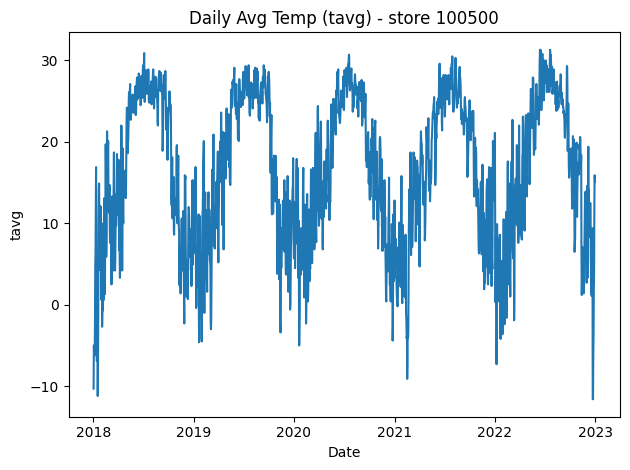

Saved plot to reports/plots/example_store_tavg.png


In [24]:
import matplotlib.pyplot as plt
import os

os.makedirs("reports/plots", exist_ok=True)

# pick one store that isn't empty
example_store = weather_features.loc[weather_features["tavg"].notna(), "store_id"].iloc[0]
tmp = weather_features[weather_features["store_id"] == example_store].copy()

plt.figure()
plt.plot(tmp["invoice_date"], tmp["tavg"])
plt.title(f"Daily Avg Temp (tavg) - store {example_store}")
plt.xlabel("Date")
plt.ylabel("tavg")
plt.tight_layout()
plt.savefig("reports/plots/example_store_tavg.png")
plt.show()

print("Saved plot to reports/plots/example_store_tavg.png")

In [25]:
import os

os.makedirs("data_processed", exist_ok=True)

out_path = "data_processed/weather_features_2018_2022.csv"
weather_features.to_csv(out_path, index=False)

schema_path = "data_processed/weather_features_schema.txt"
with open(schema_path, "w") as f:
    for c in weather_features.columns:
        f.write(c + "\n")

print("Saved:", out_path)
print("Saved:", schema_path)

Saved: data_processed/weather_features_2018_2022.csv
Saved: data_processed/weather_features_schema.txt


In [26]:
from src.weather.meteostat_client import get_daily_weather, WeatherConfig
from pathlib import Path

cfg = WeatherConfig(cache_dir=Path("data_raw/weather_cache"))

# Pick one store and call again
test_store = stores.iloc[0]
get_daily_weather(
    store_id=str(test_store["store_id"]),
    lat=float(test_store["store_latitude"]),
    lon=float(test_store["store_longitude"]),
    start_date=start_date,
    end_date=end_date,
    cfg=cfg,
    refresh=False,
    verbose=True
)

[CACHE_HIT] store_id=79609
[COVERAGE] store_id=79609, rows=1825


,store_id,invoice_date,tavg,tmin,tmax,prcp,snow,wspd
0,79609,2018-01-02,-13.8,-19.3,-6.6,0.0,0.0,5.4
1,79609,2018-01-03,-9.3,-15.5,-0.5,0.0,0.0,13.7
2,79609,2018-01-04,-7.9,-13.2,-4.9,0.0,0.0,16.9
3,79609,2018-01-05,-11.1,-14.9,-7.1,0.0,0.0,9.4
4,79609,2018-01-06,-12.3,-18.8,-5.5,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
1820,79609,2022-12-27,-0.6,-2.7,1.7,0.0,5.0,9.4
1821,79609,2022-12-28,2.6,-2.7,11.7,0.0,3.0,19.1
1822,79609,2022-12-29,10.3,5.6,18.3,0.0,0.0,20.5
1823,79609,2022-12-30,15.6,12.2,20.6,0.0,0.0,19.1


In [27]:
import pandas as pd

check = pd.read_csv("data_processed/weather_features_2018_2022.csv")
print(check.shape)
print("Unique stores:", check["store_id"].nunique())
print("Unique dates per store (sample):")
print(
    check.groupby("store_id")["invoice_date"]
    .nunique()
    .head()
)

(801175, 34)
Unique stores: 439
Unique dates per store (sample):
store_id
79609    1825
81958    1825
83444    1825
84321    1825
84328    1825
Name: invoice_date, dtype: int64


In [28]:
print(weather_features[[
    "tavg",
    "tavg_lag1",
    "tavg_rollmean_7",
    "tavg_anom_30"
]].head(10))

   tavg  tavg_lag1  tavg_rollmean_7  tavg_anom_30
0 -10.3        NaN              NaN           NaN
1  -5.0      -10.3              NaN           NaN
2  -6.3       -5.0              NaN           NaN
3  -6.2       -6.3              NaN           NaN
4  -5.7       -6.2              NaN           NaN
5  -2.5       -5.7              NaN           NaN
6   4.8       -2.5              NaN           NaN
7   6.1        4.8        -4.457143           NaN
8  11.1        6.1        -2.114286           NaN
9  16.9       11.1         0.185714           NaN
